<a href="https://colab.research.google.com/github/ruchithareddy269/256-Project-Book_Recommendation_System/blob/main/book_recommendation_system_256.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Book Recommendation System using Neural Networks**

Link to the dataset:https://www.kaggle.com/datasets/zygmunt/goodbooks-10k


In this notebook, we will embark on the journey of building a sophisticated machine learning model that aims to personalize the user experience by suggesting books tailored to their unique tastes. Leveraging the power of neural networks, specifically feedforward neural networks with embedding layers, our system will learn from historical user-book interactions to predict ratings and recommend books.

The model uses a combination of user and book IDs to capture the complex interactions between different users and a wide array of books. Through embedding layers, we can translate these IDs into meaningful vectors that represent latent user preferences and book features. The dense layers of the network will then interact these embeddings to understand and predict user preferences for books they haven't yet interacted with.

The end goal of this project is not just to create a list of recommended books but to enhance the way users discover books, making recommendations more engaging and relevant. This notebook will guide you through the data preprocessing, model building, training, and evaluation stages, culminating in a functional book recommendation system ready to serve real-time predictions.


## **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Data preprocessing**
We will only need the books.csv and ratings.csv as those two files contains all the information we need for our model.

In [46]:
#reading the data
books=pd.read_csv('/content/drive/MyDrive/cmpe256-project/books.csv')
ratings=pd.read_csv('/content/drive/MyDrive/cmpe256-project/ratings.csv')
books

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,17204,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,12582,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,...,11279,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...


In [4]:
ratings

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4
...,...,...,...
981751,10000,48386,5
981752,10000,49007,4
981753,10000,49383,5
981754,10000,50124,5


As we can see, there are a lot of extra features that are not necessary for our recommendation.

We'll only take note of the pertinent features.


In [5]:

columns = ['id', 'book_id', 'isbn', 'authors', 'original_publication_year', 'title', 'average_rating',
           'ratings_count', 'small_image_url']
books_new = books[columns]
books_new.head()

,id,book_id,isbn,authors,original_publication_year,title,average_rating,ratings_count,small_image_url
0,1,2767052,439023483,Suzanne Collins,2008.0,"The Hunger Games (The Hunger Games, #1)",4.34,4780653,https://images.gr-assets.com/books/1447303603s...
1,2,3,439554934,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,https://images.gr-assets.com/books/1474154022s...
2,3,41865,316015849,Stephenie Meyer,2005.0,"Twilight (Twilight, #1)",3.57,3866839,https://images.gr-assets.com/books/1361039443s...
3,4,2657,61120081,Harper Lee,1960.0,To Kill a Mockingbird,4.25,3198671,https://images.gr-assets.com/books/1361975680s...
4,5,4671,743273567,F. Scott Fitzgerald,1925.0,The Great Gatsby,3.89,2683664,https://images.gr-assets.com/books/1490528560s...


In [6]:
books_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   isbn                       9300 non-null   object 
 3   authors                    10000 non-null  object 
 4   original_publication_year  9979 non-null   float64
 5   title                      10000 non-null  object 
 6   average_rating             10000 non-null  float64
 7   ratings_count              10000 non-null  int64  
 8   small_image_url            10000 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 703.2+ KB



#Checking null values For books

In [7]:
books_new.isna().sum()

id                             0
book_id                        0
isbn                         700
authors                        0
original_publication_year     21
title                          0
average_rating                 0
ratings_count                  0
small_image_url                0
dtype: int64

In [44]:
books_new = books_new.fillna('NA')
books_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   isbn                       10000 non-null  object 
 3   authors                    10000 non-null  object 
 4   original_publication_year  10000 non-null  object 
 5   title                      10000 non-null  object 
 6   average_rating             10000 non-null  float64
 7   ratings_count              10000 non-null  int64  
 8   small_image_url            10000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 703.2+ KB


In [45]:
ratings.isna().sum()

book_id    0
user_id    0
rating     0
dtype: int64

There is no null value here.

There is not much preprocessing needed further as the relevant books details are already extracted and null values have been dealt with. We will now save the dataset for later use during recommendation.

In [10]:
books_new.to_csv('books_cleaned.csv')


# **Exploratory Data Analysis**

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [12]:
tags = pd.read_csv('/content/drive/MyDrive/cmpe256-project/tags.csv')
tags


,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-
...,...,...
34247,34247,Ｃhildrens
34248,34248,Ｆａｖｏｒｉｔｅｓ
34249,34249,Ｍａｎｇａ
34250,34250,ＳＥＲＩＥＳ


In [13]:

book_tags = pd.read_csv('/content/drive/MyDrive/cmpe256-project/book_tags.csv')
book_tags

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716
...,...,...,...
999907,33288638,21303,7
999908,33288638,17271,7
999909,33288638,1126,7
999910,33288638,11478,7


In [14]:
books.head()


,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [15]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [16]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

In [17]:
books.describe()

,id,book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.415000e+03,9979.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,5000.50000,5.264697e+06,5.471214e+06,8.646183e+06,75.712700,9.755044e+12,1981.987674,4.002191,5.400124e+04,5.968732e+04,2919.955300,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04
std,2886.89568,7.575462e+06,7.827330e+06,1.175106e+07,170.470728,4.428619e+11,152.576665,0.254427,1.573700e+05,1.678038e+05,6124.378132,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04
min,1.00000,1.000000e+00,1.000000e+00,8.700000e+01,1.000000,1.951703e+08,-1750.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,2500.75000,4.627575e+04,4.791175e+04,1.008841e+06,23.000000,9.780316e+12,1990.000000,3.850000,1.356875e+04,1.543875e+04,694.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03
50%,5000.50000,3.949655e+05,4.251235e+05,2.719524e+06,40.000000,9.780452e+12,2004.000000,4.020000,2.115550e+04,2.383250e+04,1402.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03
75%,7500.25000,9.382225e+06,9.636112e+06,1.451775e+07,67.000000,9.780831e+12,2011.000000,4.180000,4.105350e+04,4.591500e+04,2744.250000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04
max,10000.00000,3.328864e+07,3.553423e+07,5.639960e+07,3455.000000,9.790008e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


In [18]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981756 entries, 0 to 981755
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   book_id  981756 non-null  int64
 1   user_id  981756 non-null  int64
 2   rating   981756 non-null  int64
dtypes: int64(3)
memory usage: 22.5 MB


In [19]:
ratings.describe()

,book_id,user_id,rating
count,981756.000000,981756.000000,981756.000000
mean,4943.275636,25616.759933,3.856534
std,2873.207415,15228.338826,0.983941
min,1.000000,1.000000,1.000000
25%,2457.000000,12372.000000,3.000000
50%,4921.000000,25077.000000,4.000000
75%,7414.000000,38572.000000,5.000000
max,10000.000000,53424.000000,5.000000


#Let's explore the top rated books

[]

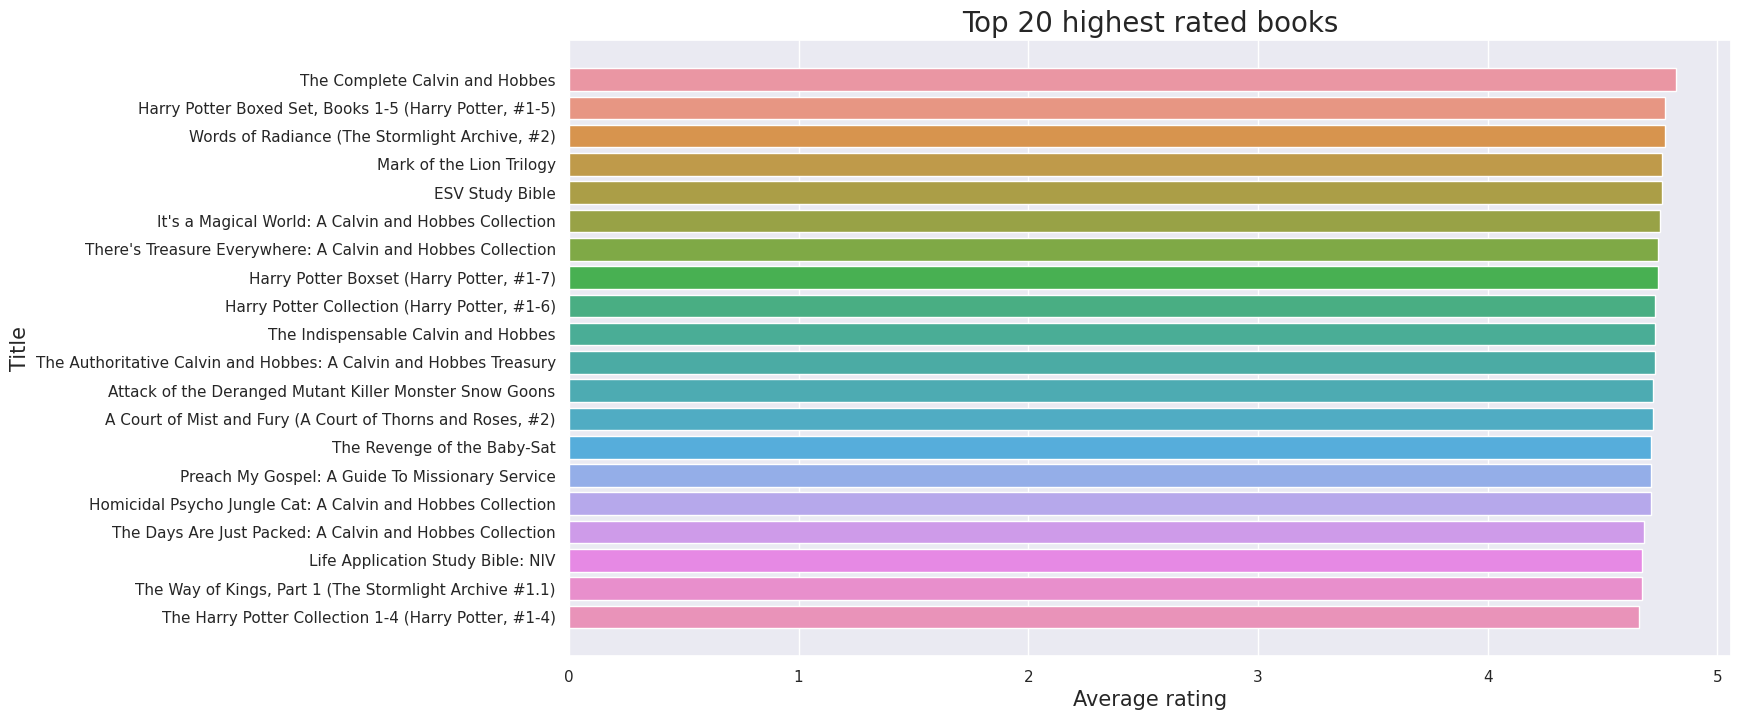

In [20]:
top_rated = books.sort_values('average_rating', ascending=False)
top_rated = top_rated[:20]

plt.figure(figsize = (15,8))
sns.barplot(data = top_rated, y = 'title', x = 'average_rating')
plt.ylabel('Title', fontsize = 15)
plt.xlabel('Average rating', fontsize = 15)
plt.title('Top 20 highest rated books', fontsize = 20)

plt.plot()

## Now let's find out the top 20 most popular books

[]

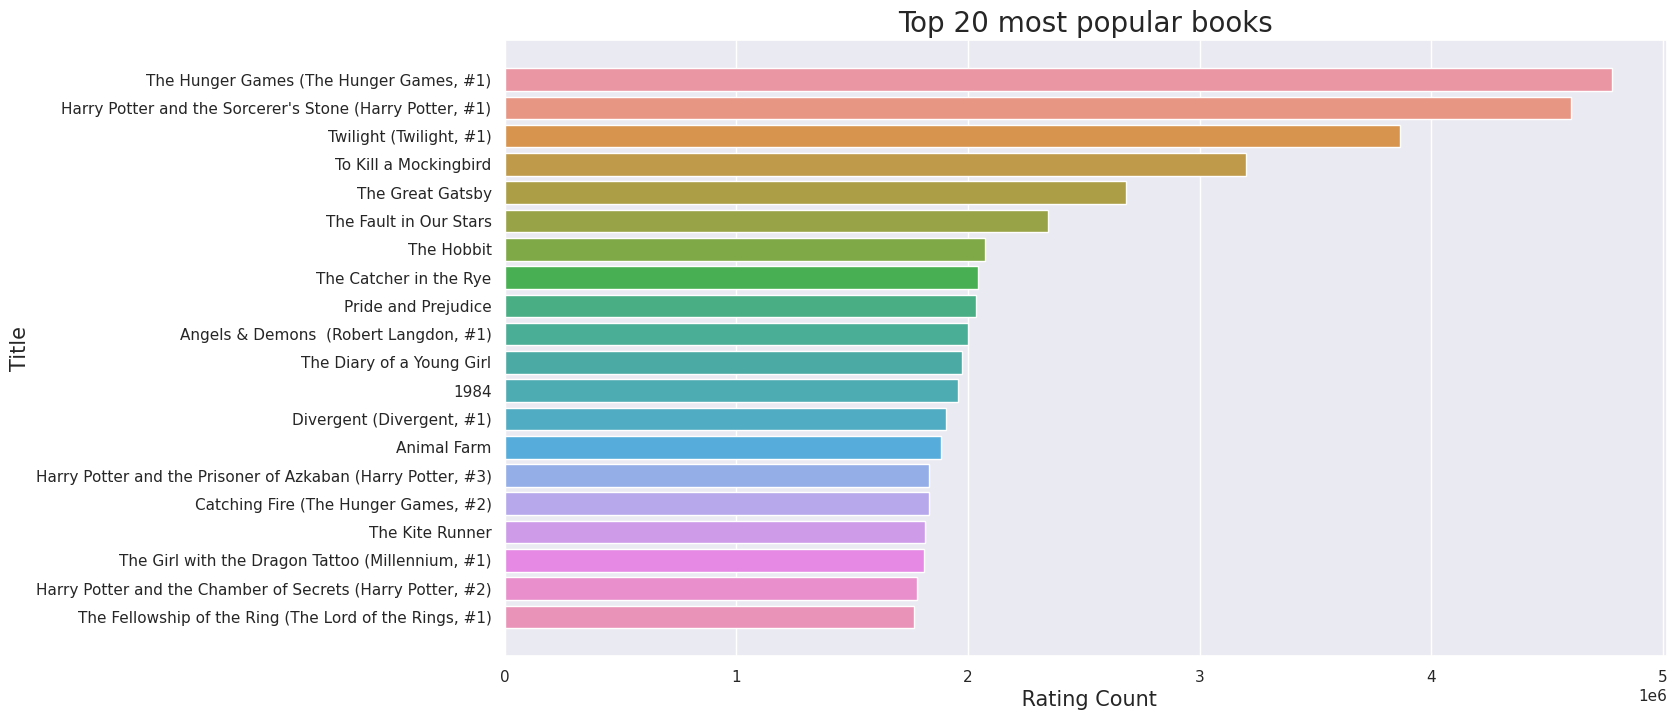

In [21]:
top_popular = books.sort_values('ratings_count', ascending=False)
top_popular = top_popular[:20]

plt.figure(figsize = (15,8))
sns.barplot(data = top_popular, y = 'title', x = 'ratings_count')
plt.ylabel('Title', fontsize = 15)
plt.xlabel(' Rating Count', fontsize = 15)
plt.title('Top 20 most popular books', fontsize = 20)

plt.plot()

# Top authors

[]

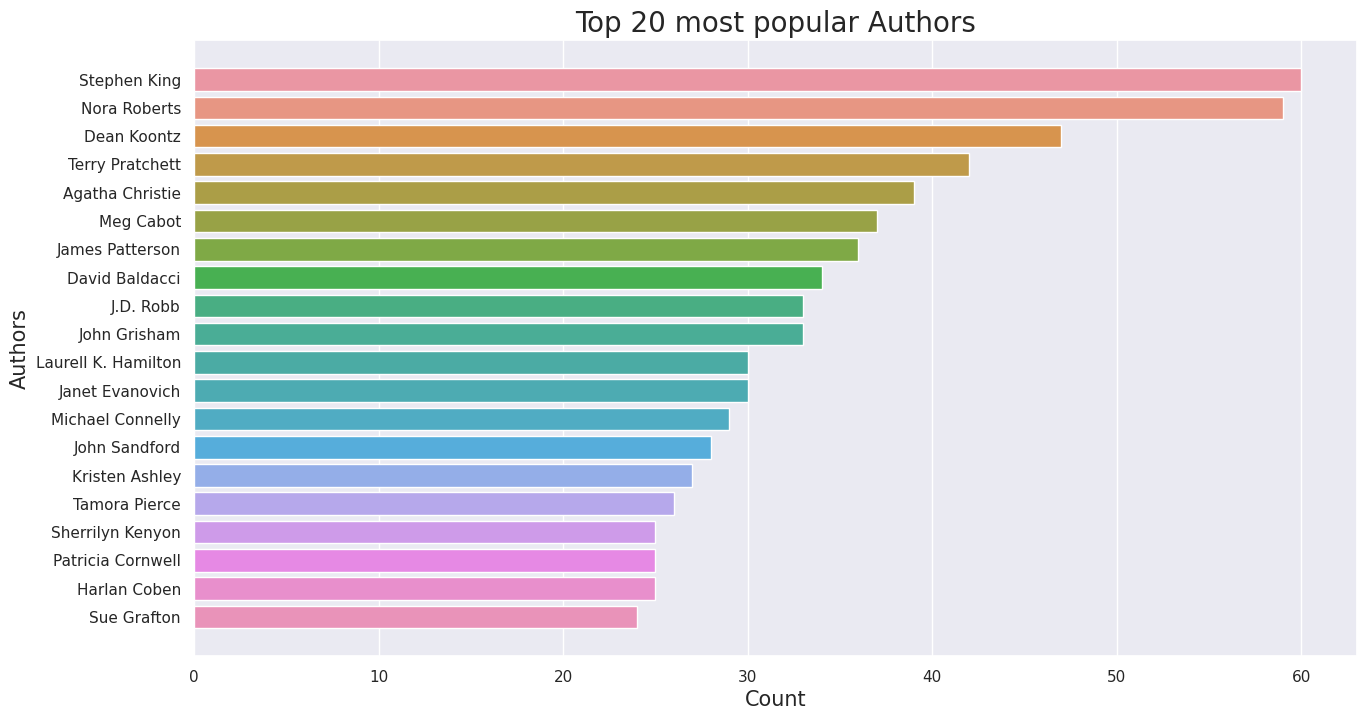

In [22]:
top_author_counts = books['authors'].value_counts().reset_index()
top_author_counts.columns = ['authors', 'count']
top_author_counts = top_author_counts.sort_values('count', ascending=False)

plt.figure(figsize = (15,8))
sns.barplot(data = top_author_counts.head(20), y = 'authors', x = 'count')
plt.ylabel('Authors', fontsize = 15)
plt.xlabel('Count', fontsize = 15)
plt.title('Top 20 most popular Authors', fontsize = 20)

plt.plot()

# Most ratings

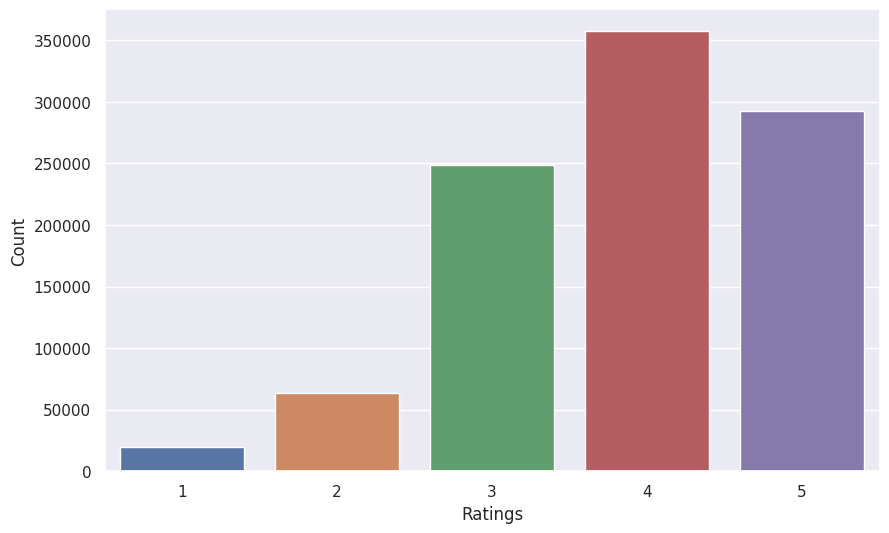

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(data = ratings, x = 'rating')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

People tend to give 4 star rating to most books

In [24]:
import pandas as pd
import numpy as np
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [25]:
books = pd.read_csv('/content/drive/MyDrive/cmpe256-project/books_cleaned.csv')
books

,Unnamed: 0,id,book_id,isbn,authors,original_publication_year,title,average_rating,ratings_count,small_image_url
0,0,1,2767052,439023483,Suzanne Collins,2008.0,"The Hunger Games (The Hunger Games, #1)",4.34,4780653,https://images.gr-assets.com/books/1447303603s...
1,1,2,3,439554934,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,https://images.gr-assets.com/books/1474154022s...
2,2,3,41865,316015849,Stephenie Meyer,2005.0,"Twilight (Twilight, #1)",3.57,3866839,https://images.gr-assets.com/books/1361039443s...
3,3,4,2657,61120081,Harper Lee,1960.0,To Kill a Mockingbird,4.25,3198671,https://images.gr-assets.com/books/1361975680s...
4,4,5,4671,743273567,F. Scott Fitzgerald,1925.0,The Great Gatsby,3.89,2683664,https://images.gr-assets.com/books/1490528560s...
...,...,...,...,...,...,...,...,...,...,...
9995,9995,9996,7130616,441019455,Ilona Andrews,2010.0,"Bayou Moon (The Edge, #2)",4.09,17204,https://images.gr-assets.com/books/1307445460s...
9996,9996,9997,208324,067973371X,Robert A. Caro,1990.0,"Means of Ascent (The Years of Lyndon Johnson, #2)",4.25,12582,https://s.gr-assets.com/assets/nophoto/book/50...
9997,9997,9998,77431,039330762X,Patrick O'Brian,1977.0,The Mauritius Command,4.35,9421,https://images.gr-assets.com/books/1455373531s...
9998,9998,9999,8565083,61711527,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,3.65,11279,https://images.gr-assets.com/books/1279214118s...


# Splitting the data

In [26]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(ratings, test_size=0.2, random_state=42)

print(f"Shape of train data: {train.shape}")
print(f"Shape of test data: {test.shape}")

Shape of train data: (785404, 3)
Shape of test data: (196352, 3)


# Basic overview of the architecture


The Neural Network architecture we’re going to create will have two input embedding layers. The first embedding layer accepts the books, and the second the users. These two embeddings are trained separately and then combined together before being passed to a dense layer.

We will create seperate embedding layers for the two and then concatenate them, pass them through a dense layer and finally an output layer that will predict a single rating.
Let's grab the no. of unique book_id and user_id from the ratings dataset

In [27]:
#nunique() will return the total number of unique items

book_id = ratings.book_id.nunique()

user_id = ratings.user_id.nunique()


In [28]:
print('Total books: ' + str(book_id))
print('Total users: ' + str(user_id))

Total books: 10000
Total users: 53424


# Model building

Here neural networks are employed to create a personalized book recommendation system. By utilizing embedding layers and deep learning techniques, the model effectively learns from user and book data, uncovering complex relationships to deliver tailored book suggestions. This approach showcases the power of neural networks in enhancing user engagement and transforming the book discovery experience.

In [29]:
from tensorflow.keras.layers import Dense, Flatten, Input, Embedding, Concatenate, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [30]:
#Embedding layer for books
books_input = Input(shape=[1])#1st Input Layer
embedding_layer_books = Embedding(book_id + 1,10)(books_input)#Embedding layer
embedding_output_books = Flatten()(embedding_layer_books)#Embedding layer output

#Embedding layer for users
users_input = Input(shape=[1])#1st Input Layer
embedding_layer_users = Embedding(user_id + 1,10)(users_input)#Embedding layer
embedding_output_users = Flatten()(embedding_layer_users)#Embedding layer output

Note: We are appending the input layers on top of embedding layers. This is an action of functional API. It basically means that the outputs of those input layers is passed on to the embedding layers.

In [31]:
#Concatination and Dense layer

joining_layer = Concatenate()([embedding_output_books, embedding_output_users])
hidden_layer_1 = Dense(128, activation='relu')(joining_layer)
hidden_layer_1 = Dropout(0.5)(hidden_layer_1)

output_layer = hidden_layer_2 = Dense(1)(hidden_layer_1)
# Here we are creating the tensorflow Keras model.
#Functional api: This code uses TensorFlow's functional API, which is a more flexible way of creating models that allows for complex architectures.
#This is useful in cases where models have multiple inputs or outputs, or when you need to implement a model with shared layers, residual connections, or other advanced network architectures.
model = tf.keras.Model([books_input, users_input], output_layer)

Note: Here also we passed the output of the joining layer to the hidden dense layer, output of the hidden layer to the final output layer.

In [32]:
#Model compilation

optimizer = Adam(lr=0.001, epsilon = 1e-6, amsgrad=True) #epsilon = decay rate
model.compile(optimizer = optimizer, loss = 'mean_squared_error')#Using mean squared error as loss function

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 embedding (Embedding)       (None, 1, 10)                100010    ['input_1[0][0]']             
                                                                                                  
 embedding_1 (Embedding)     (None, 1, 10)                534250    ['input_2[0][0]']             
                                                                                              

The below line sets up an early stopping callback, which is a way to prevent overfitting. The monitor='val_loss' argument means that the callback will monitor the validation loss during training. If the validation loss doesn't improve (decrease) for a number of epochs the training will stop early. This means if the validation loss doesn't improve in the subsequent epoch, training will halt.

In [33]:
#Training model

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 1)

model.fit(
    [train.book_id, train.user_id], train.rating,
    batch_size=64,
    epochs=15,
    verbose=1,
    callbacks = [early_stopping],
    validation_data=([test.book_id, test.user_id], test.rating))

Epoch 1/15
12272/12272 [==============================] - 135s 11ms/step - loss: 1.0523 - val_loss: 0.7260
Epoch 2/15
12272/12272 [==============================] - 147s 12ms/step - loss: 0.8039 - val_loss: 0.7113
Epoch 3/15
12272/12272 [==============================] - 125s 10ms/step - loss: 0.7473 - val_loss: 0.7111
Epoch 4/15
12272/12272 [==============================] - 125s 10ms/step - loss: 0.7142 - val_loss: 0.7080
Epoch 5/15
12272/12272 [==============================] - 122s 10ms/step - loss: 0.6870 - val_loss: 0.7066
Epoch 6/15
12272/12272 [==============================] - 124s 10ms/step - loss: 0.6653 - val_loss: 0.7036
Epoch 7/15
12272/12272 [==============================] - 125s 10ms/step - loss: 0.6450 - val_loss: 0.7029
Epoch 8/15
12272/12272 [==============================] - 125s 10ms/step - loss: 0.6288 - val_loss: 0.7058


<Axes: >

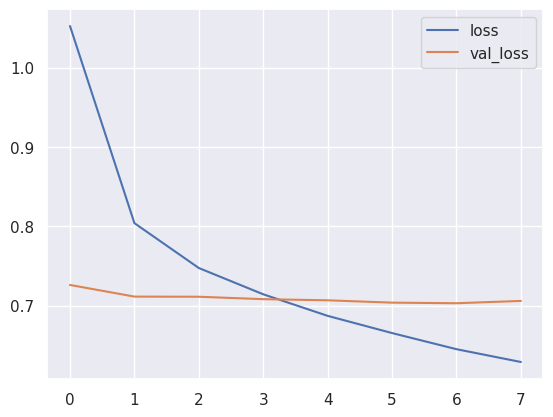

In [34]:
loss = pd.DataFrame(model.history.history)

loss[['loss', 'val_loss']].plot()

In [35]:
#Saving the model
model.save('model.h5')

In [37]:
import tensorflow as tf
import joblib

In [38]:
model = tf.keras.models.load_model('model.h5')

In [39]:
books = books.drop('Unnamed: 0', axis = 1)

In [40]:
books.head(3)

,id,book_id,isbn,authors,original_publication_year,title,average_rating,ratings_count,small_image_url
0,1,2767052,439023483,Suzanne Collins,2008.0,"The Hunger Games (The Hunger Games, #1)",4.34,4780653,https://images.gr-assets.com/books/1447303603s...
1,2,3,439554934,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,https://images.gr-assets.com/books/1474154022s...
2,3,41865,316015849,Stephenie Meyer,2005.0,"Twilight (Twilight, #1)",3.57,3866839,https://images.gr-assets.com/books/1361039443s...


In [47]:
#Defining a function that will recommend top 5 books
def recommend(user_id):
  books = pd.read_csv('/content/drive/MyDrive/cmpe256-project/books_cleaned.csv')
  ratings = pd.read_csv('/content/drive/MyDrive/cmpe256-project/ratings.csv')

  book_id = list(ratings.book_id.unique()) #grabbing all the unique books

  book_arr = np.array(book_id) #geting all book IDs and storing them in the form of an array
  user_arr = np.array([user_id for i in range(len(book_id))])
  prediction = model.predict([book_arr, user_arr])

  prediction = prediction.reshape(-1) #reshape to single dimension
  prediction_ids = np.argsort(-prediction)[0:5]

  recommended_books = pd.DataFrame(books.iloc[prediction_ids], columns = ['book_id', 'authors', 'title', 'average_rating' ])
  print('Top 5 recommended books for you: \n')
  return recommended_books

So basically what's happening here is that, based on a particular user, the model learns the user's behaviour and predicts the user's ratings that he/she might rate on all the books. Then with the .argsort() we are sorting those predictions and returning the top 5 ratings's indices . After that according to those indices , we are mapping the books from the books dataset and recommending the top 5 books that the user might like.

In [48]:
ratings.user_id.unique().max()

53424

# Final Output

In [52]:
#Enter a number between 1 and 53424
recommend(333)

313/313 [==============================] - 1s 2ms/step
Top 5 recommended books for you: 



,book_id,authors,title,average_rating
5206,24818,Bill Watterson,The Days Are Just Packed: A Calvin and Hobbes ...,4.68
6919,24815,Bill Watterson,The Indispensable Calvin and Hobbes,4.73
861,17332218,Brandon Sanderson,"Words of Radiance (The Stormlight Archive, #2)",4.77
9565,70487,Bill Watterson,Attack of the Deranged Mutant Killer Monster S...,4.72
7253,24816,Bill Watterson,Homicidal Psycho Jungle Cat: A Calvin and Hobb...,4.71


# **Conclusion:**
##The recommendation system function recommend(user_id) has been successfully implemented and tested. It effectively provides personalized book recommendations by leveraging a trained neural network model. When provided with a user ID, the system processes the entire catalog of books and predicts the top 5 books that the user is likely to enjoy, based on learned user preferences and book attributes. The system outputs a neatly formatted list of recommended books, including their IDs, authors, titles, and average ratings, demonstrating its potential to enhance user experience in a real-world book recommendation scenario. This represents a significant step towards creating an intelligent, data-driven approach to book discovery, tailored to individual user tastes.